In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../Data/MNCAATourneyCompactResults.csv')

In [5]:
df.index
df.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0
2250,2019,154,1438,85,1403,77,N,1


In [6]:
#merge seeds and box score with compact results 
Seeds = pd.read_csv('../Data/MNCAATourneySeeds.csv')
BoxScore = pd.read_csv('../Data/MNCAATourneyDetailedResults.csv')
df = df.merge(Seeds, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID']).drop('TeamID', axis=1).rename(columns={'Seed': 'WSeed'})
df = df.merge(Seeds, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID']).drop('TeamID', axis=1).rename(columns={'Seed': 'LSeed'})

df = df.merge(BoxScore, how='left', left_on=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT'], right_on=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT'])

#seed to float
df['WSeed'] = df['WSeed'].str.replace(r'[^0-9]', '').astype('float')
df['LSeed'] = df['LSeed'].str.replace(r'[^0-9]', '').astype('float')

#add point differential 
NewCol = df["WScore"] - df["LScore"]
df.insert(0, 'PointDiff', NewCol)


df.head()


<ipython-input-6-e1151862ac39>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['WSeed'] = df['WSeed'].str.replace(r'[^0-9]', '').astype('float')
<ipython-input-6-e1151862ac39>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['LSeed'] = df['LSeed'].str.replace(r'[^0-9]', '').astype('float')


,PointDiff,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,9,1985,136,1116,63,1234,54,N,0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1985,136,1120,59,1345,58,N,0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25,1985,136,1207,68,1250,43,N,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1985,136,1229,58,1425,55,N,0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1985,136,1242,49,1325,38,N,0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna()
df

,PointDiff,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1136,8,2003,134,1421,92,1411,84,N,1,16.0,...,31.0,14.0,31.0,17.0,28.0,16.0,15.0,5.0,0.0,22.0
1137,29,2003,136,1112,80,1436,51,N,0,1.0,...,16.0,7.0,7.0,8.0,26.0,12.0,17.0,10.0,3.0,15.0
1138,13,2003,136,1113,84,1272,71,N,0,10.0,...,28.0,14.0,21.0,20.0,22.0,11.0,12.0,2.0,5.0,18.0
1139,6,2003,136,1141,79,1166,73,N,0,11.0,...,17.0,12.0,17.0,14.0,17.0,20.0,21.0,6.0,6.0,21.0
1140,2,2003,136,1143,76,1301,74,N,1,8.0,...,21.0,15.0,20.0,10.0,26.0,16.0,14.0,5.0,8.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,6,2019,146,1120,77,1246,71,N,1,5.0,...,21.0,12.0,21.0,11.0,30.0,14.0,14.0,5.0,5.0,19.0
2247,1,2019,146,1277,68,1181,67,N,0,2.0,...,21.0,8.0,13.0,13.0,29.0,14.0,17.0,4.0,9.0,9.0
2248,10,2019,152,1403,61,1277,51,N,0,3.0,...,24.0,14.0,18.0,8.0,28.0,6.0,11.0,1.0,2.0,15.0
2249,1,2019,152,1438,63,1120,62,N,0,1.0,...,31.0,11.0,14.0,9.0,24.0,9.0,5.0,3.0,3.0,12.0


In [8]:
df["PointDiff"] = df["PointDiff"].astype(float)
#add seed differential 
NewCol1 = df["WSeed"] - df["LSeed"]
df.insert(loc=0, column='SeedDiff', value=NewCol1)





In [9]:
#Points
df['WPts'] = df.apply(lambda x: 2*x.WFGM + x.WFGM3 + x.WFTM, axis=1)
df['LPts'] = df.apply(lambda x: 2*x.LFGM + x.LFGM3 + x.LFTM, axis=1)

#Possessions for each team
#This is the generally accepted best method for calculating possessions
wPos = df.apply(lambda x: 0.96*(x.WFGA + x.WTO + 0.44*x.WFTA - x.WOR), axis=1)
lPos = df.apply(lambda x: 0.96*(x.LFGA + x.LTO + 0.44*x.LFTA - x.LOR), axis=1)

#average possessions for good estimate
df['Pos'] = (wPos+lPos)/2

#Offensive efficiency = 100 x (Points / Possessions)
df['WOffRtg'] = df.apply(lambda x: 100 * (x.WPts / x.Pos), axis=1)
df['LOffRtg'] = df.apply(lambda x: 100 * (x.LPts / x.Pos), axis=1)
#Defensive efficiency = 100 x (Opponent points / Opponent possessions)
df['WDefRtg'] = df.LOffRtg
df['LDefRtg'] = df.WOffRtg
#Net Rating = Off.Rtg - Def.Rtg
df['WNetRtg'] = df.apply(lambda x:(x.WOffRtg - x.WDefRtg), axis=1)
df['LNetRtg'] = df.apply(lambda x:(x.LOffRtg - x.LDefRtg), axis=1)

#Field Goal Percantage
df['WFG%'] = df.apply(lambda x: (x.WFGM / x.WFGA), axis=1)
df['LFG%'] = df.apply(lambda x: (x.LFGM / x.LFGA), axis=1)

#True Shooting Percentage = Points/2(Field Goal Attempts + .44(Free Throw Attempts))
df['WTS%'] = df.apply(lambda x: 100*((x.WFGM3 + 2*x.WFGM + x.WFTM) / (2*(x.WFGA + .44*x.WFTA))), axis=1)
df['LTS%'] = df.apply(lambda x: 100*((x.LFGM3 + 2*x.LFGM + x.WFTM) / (2*(x.LFGA + .44*x.LFTA))), axis=1)

df.tail()


,SeedDiff,PointDiff,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,...,WOffRtg,LOffRtg,WDefRtg,LDefRtg,WNetRtg,LNetRtg,WFG%,LFG%,WTS%,LTS%
2246,3.0,6.0,2019,146,1120,77,1246,71,N,1,...,110.025149,101.451760,101.451760,110.025149,8.573388,-8.573388,0.400000,0.442623,50.952885,54.812073
2247,1.0,1.0,2019,146,1277,68,1181,67,N,0,...,104.659180,103.120075,103.120075,104.659180,1.539106,-1.539106,0.428571,0.456140,46.806167,48.628827
2248,1.0,10.0,2019,152,1403,61,1277,51,N,0,...,107.116768,89.556642,89.556642,107.116768,17.560126,-17.560126,0.431373,0.319149,53.772920,40.968682
2249,-4.0,1.0,2019,152,1438,63,1120,62,N,0,...,112.718997,110.929806,110.929806,112.718997,1.789190,-1.789190,0.490196,0.381818,55.970149,46.599084
2250,-2.0,8.0,2019,154,1438,85,1403,77,N,1,...,128.582147,116.480298,116.480298,128.582147,12.101849,-12.101849,0.457627,0.428571,61.487269,60.344828


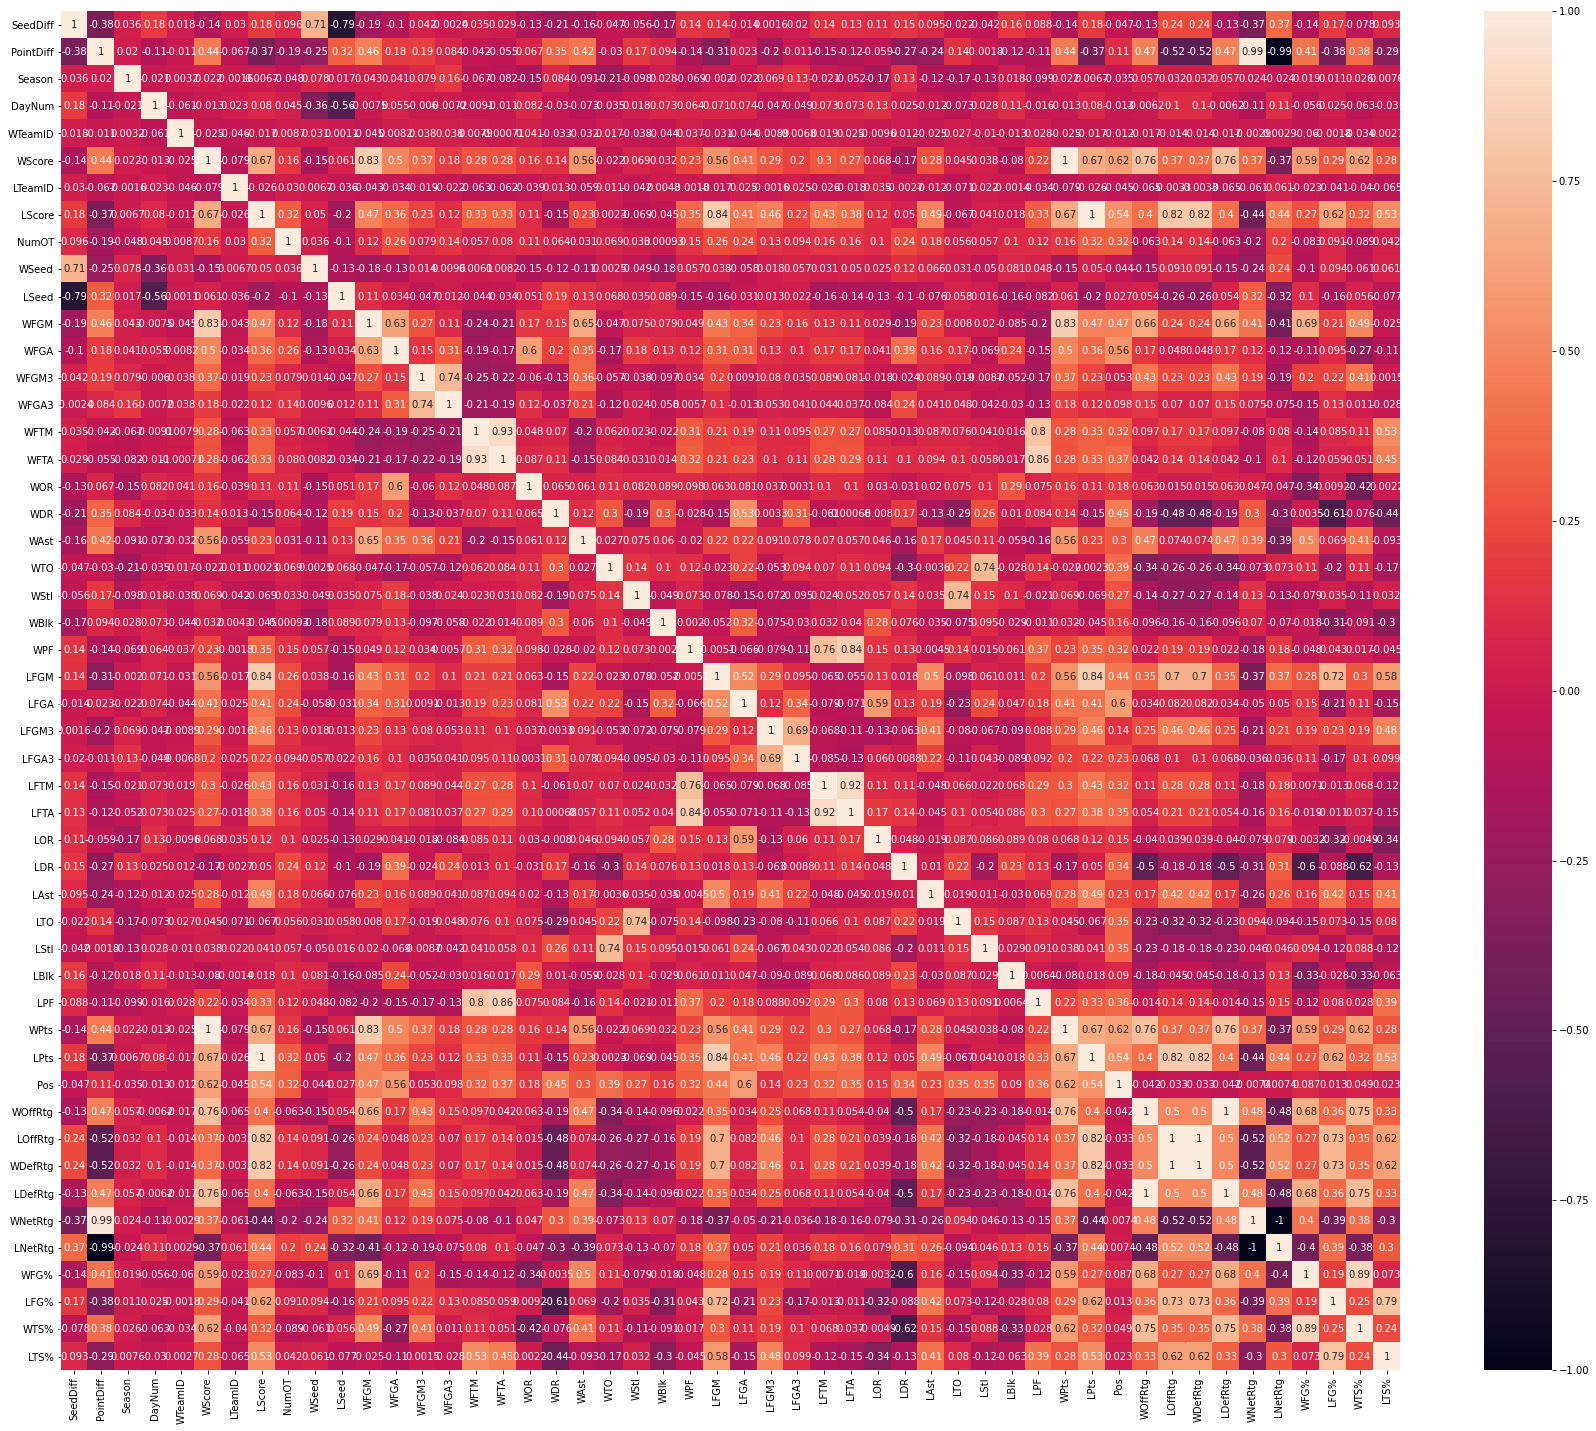

In [10]:
corrMatrix = df[df.columns[:]].corr()
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['WFGM','WAst','WOffRtg','WPts']].dropna()
y = df.loc[X.index]['PointDiff']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(model.intercept_)
print(model.coef_)

-25.414978833799108
[ 0.30135476  0.39264369  0.2076553  -0.01698984]


In [30]:
model.score(X_test, y_test)


0.19868411815515752

Text(0, 0.5, 'Point Differential')

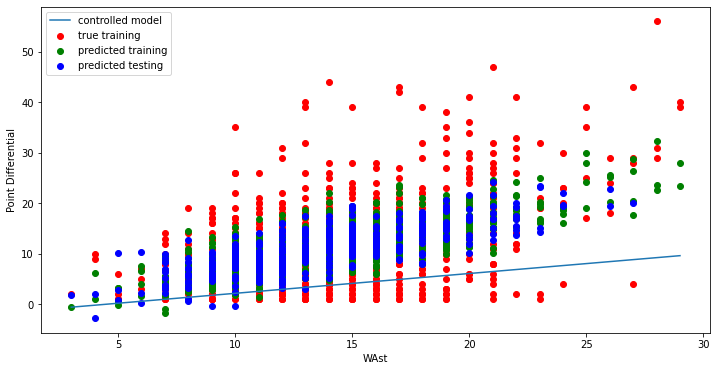

In [27]:
import numpy as np
# quickly visualize results
col_name = 'WAst'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),100)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Point Differential')